In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
print(nfaces)
#nfaces = np.ndarray.flatten(mat_contents['nfaces'])

[64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


In [18]:
print(np.sum(nfaces[:36]))
print(nfaces)
print(m)
print(n)

2282
[64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
168
192


In [21]:
trainingFaces = faces[:,:np.sum(nfaces[:36])]
print(trainingFaces.shape)
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1
print(avgFace.shape)

(32256, 2282)
(32256,)


In [36]:
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.diag(S)
print(U.shape)

(32256, 2282)


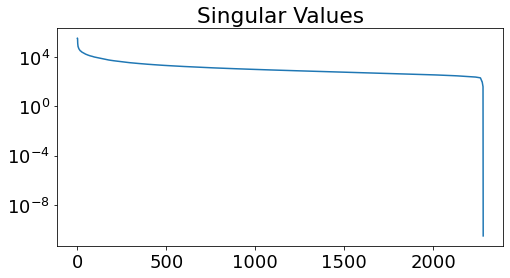

In [35]:
plt.rcParams['figure.figsize'] = [8, 4]

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()


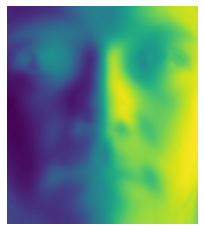

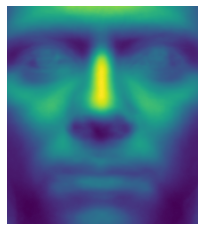

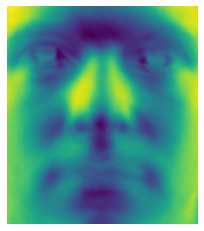

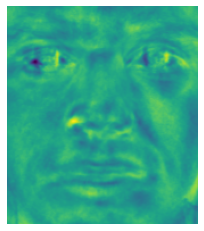

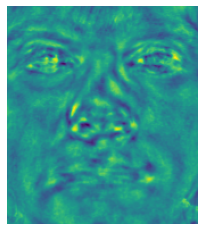

In [44]:
j = 0
for k in [1,2,3,100,200]:
    eigvec = np.reshape(U[:,k], (m,n)).T
    plt.figure(j+1)
    j +=1
    img = plt.imshow(eigvec)
    plt.axis('off')
    plt.show()